Top Spotify Artists by Views
Data Curation and Analysis

Step 1: Data Extraction

Import the required libraries to begin the process.
For this process, I utilized Pandas, BeautifulSoup, Numpy, Matplotlib, and Requests.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import numpy as np
import requests
from matplotlib import pyplot as plt
print("imported")

imported


In [2]:
opened_webpage = requests.get("https://kworb.net/spotify/artists.html")
print ("Webpage opened successfully...")

# Initialize a BeautifulSoup object to read and parse the webpage read
bs = BeautifulSoup(opened_webpage.content, "html.parser")
print ("Webpage loaded and parsed successfully...")

Webpage opened successfully...
Webpage loaded and parsed successfully...


Below, I found the tables within the webpage, and I proceeded to collect the text from each of the columns and add them to lists which I then appended to raw_data. I utilized BeautifulSoup to parse through the webpage.

In [3]:
# Define an empty list where the data will be kept
raw_data = []

# Find all the tables in the webpage page that we have just parsed
table = bs.find('table')
rows = table.find_all('tr')


for row in rows[1:]:
    column = row.find_all('td')
    column_1 = column[0].text.strip()
    column_2 = column[1].text.strip()
    column_3 = column[2].text.strip()
    column_4 = column[3].text.strip()
    column_5 = column[4].text.strip()
    column_6 = column[5].text.strip()

    raw_data.append([column_1,column_2, column_3, column_4, column_5, column_6])


Step 2: Data Transformation and load

To begin tranforming the data, I removed all the commas from the numbers to enable future conversion from strings to floats.

In [4]:
final_data = np.char.replace(raw_data,",","")
print(final_data)

[['Drake' '86765.6' '90.073' '58530.9' '33286.3' '28234.7']
 ['Bad Bunny' '68956.4' '45.271' '41758.5' '23566.3' '27197.9']
 ['Taylor Swift' '60396.0' '79.041' '58068.2' '52753.5' '2327.8']
 ...
 ['Payal Dev' '744.6' '1.656' '382.5' '0.5' '362.1']
 ['Kari Jobe' '744.2' '0.294' '668.9' '476.9' '75.3']
 ['Haikaiss' '744.1' '0.149' '528.8' '283.5' '215.3']]


Below, I proceeded to add my data into a Pandas dataframe. From here, I created my column titles from the given names at the top of the graph on the website.

In [5]:
final_data = pd.DataFrame(final_data)

columns = ["Artist", "Streams", "Daily","As lead","Solo","As Feature"]
final_data.columns = columns

final_data

,Artist,Streams,Daily,As lead,Solo,As Feature
0,Drake,86765.6,90.073,58530.9,33286.3,28234.7
1,Bad Bunny,68956.4,45.271,41758.5,23566.3,27197.9
2,Taylor Swift,60396.0,79.041,58068.2,52753.5,2327.8
3,The Weeknd,55001.1,42.422,43719.1,31809.9,11282.1
4,Ed Sheeran,48478.3,17.784,43258.3,34332.8,5220.0
...,...,...,...,...,...,...
2995,Billy Ocean,744.9,0.451,744.9,744.5,
2996,Majestic,744.8,0.476,635.9,38.1,108.9
2997,Payal Dev,744.6,1.656,382.5,0.5,362.1
2998,Kari Jobe,744.2,0.294,668.9,476.9,75.3


I noticed all of the columns had certain values which were blank. In order to prevent this from interfering from later data efforts, I turned all of these blank entries in each column into a null entry.

I then filled each of these null categories with a 0. I did this in two separate steps as I also considered removing the null categories. By turning them null first, I was able to think about what I wanted to do with the data in the future.

I then proceeded to turn each of the columns which included numbers into floats.

In [6]:
final_data['As Feature'] = final_data['As Feature'].astype(str).str.strip().replace('',np.nan)
final_data['Daily'] = final_data['Daily'].astype(str).str.strip().replace('',np.nan)
final_data['As lead'] = final_data['As lead'].astype(str).str.strip().replace('',np.nan)
final_data['Solo'] = final_data['Solo'].astype(str).str.strip().replace('',np.nan)

final_data = final_data.fillna(0)


final_data['As Feature'] = final_data['As Feature'].astype(float)
final_data['Streams'] = final_data['Streams'].astype(float)
final_data['Daily'] = final_data['Daily'].astype(float)
final_data['As lead'] = final_data['As lead'].astype(float)
final_data['Solo'] = final_data['Solo'].astype(float)

final_data

,Artist,Streams,Daily,As lead,Solo,As Feature
0,Drake,86765.6,90.073,58530.9,33286.3,28234.7
1,Bad Bunny,68956.4,45.271,41758.5,23566.3,27197.9
2,Taylor Swift,60396.0,79.041,58068.2,52753.5,2327.8
3,The Weeknd,55001.1,42.422,43719.1,31809.9,11282.1
4,Ed Sheeran,48478.3,17.784,43258.3,34332.8,5220.0
...,...,...,...,...,...,...
2995,Billy Ocean,744.9,0.451,744.9,744.5,0.0
2996,Majestic,744.8,0.476,635.9,38.1,108.9
2997,Payal Dev,744.6,1.656,382.5,0.5,362.1
2998,Kari Jobe,744.2,0.294,668.9,476.9,75.3


In order to make the data easier to process and glean insights from, I removed the last 2,500 entries and left it at the top 500 artists.

In [7]:
final_data = final_data.drop(final_data.index[500:3000])
final_data

,Artist,Streams,Daily,As lead,Solo,As Feature
0,Drake,86765.6,90.073,58530.9,33286.3,28234.7
1,Bad Bunny,68956.4,45.271,41758.5,23566.3,27197.9
2,Taylor Swift,60396.0,79.041,58068.2,52753.5,2327.8
3,The Weeknd,55001.1,42.422,43719.1,31809.9,11282.1
4,Ed Sheeran,48478.3,17.784,43258.3,34332.8,5220.0
...,...,...,...,...,...,...
495,Foster The People,4001.5,1.457,3809.1,3714.1,192.5
496,Nas,3998.6,2.193,2878.3,1746.8,1120.3
497,Cage The Elephant,3985.2,2.022,3985.2,3915.3,0.0
498,Shreya Ghoshal,3983.4,7.758,768.6,385.9,3214.8


I gathered info about the dataframe in order to assess whether I still had null values and to confirm that the type change was successful.

In [8]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      500 non-null    object 
 1   Streams     500 non-null    float64
 2   Daily       500 non-null    float64
 3   As lead     500 non-null    float64
 4   Solo        500 non-null    float64
 5   As Feature  500 non-null    float64
dtypes: float64(5), object(1)
memory usage: 23.6+ KB


I looked at the Streams category on its own in order to better understand the overall set of numbers as it connected to Top Artists.

In [9]:
final_data["Streams"].describe()

count      500.000000
mean     10142.219000
std       8970.014268
min       3981.800000
25%       5193.525000
50%       7188.150000
75%      11048.350000
max      86765.600000
Name: Streams, dtype: float64

Load:
Store data in a csv.

In [10]:
final_data.to_csv("Top-500-Spotify-Artists-Views.csv")

Step 3: Analysis: Summary and visualizations

Text(0.5, 1.0, 'Correlation Between Overall Streams and Feature Streams')

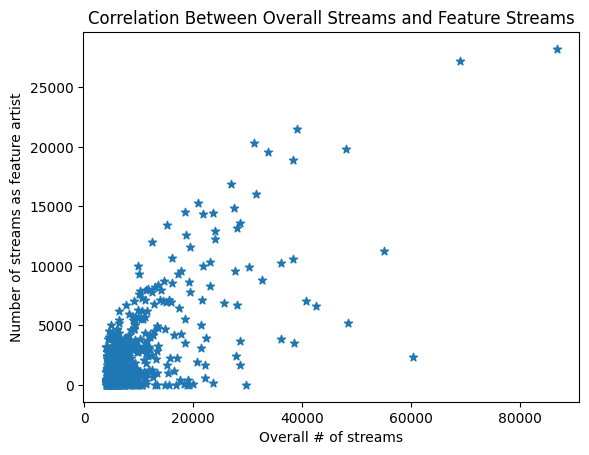

In [11]:
streams_column = final_data["Streams"]
feature_column = final_data["As Feature"]

plt.scatter(streams_column, feature_column, marker='*')

plt.xlabel("Overall # of streams")
plt.ylabel("Number of streams as feature artist")

plt.title("Correlation Between Overall Streams and Feature Streams")

In [12]:
shortened_data = final_data.copy()
shortened_data = shortened_data.drop(shortened_data.index[0:50])
shortened_data

,Artist,Streams,Daily,As lead,Solo,As Feature
50,Halsey,19235.1,5.570,10614.7,9375.6,8620.4
51,Lady Gaga,19049.7,9.297,18639.7,12349.3,410.0
52,One Direction,18988.7,8.570,18988.7,18907.1,0.0
53,Myke Towers,18724.0,15.001,6135.5,4134.0,12588.5
54,KAROL G,18508.0,23.067,12985.5,5861.7,5522.5
...,...,...,...,...,...,...
495,Foster The People,4001.5,1.457,3809.1,3714.1,192.5
496,Nas,3998.6,2.193,2878.3,1746.8,1120.3
497,Cage The Elephant,3985.2,2.022,3985.2,3915.3,0.0
498,Shreya Ghoshal,3983.4,7.758,768.6,385.9,3214.8


Text(0.5, 1.0, 'Correlation Between Overall and Feature Streams wo/ Top 50')

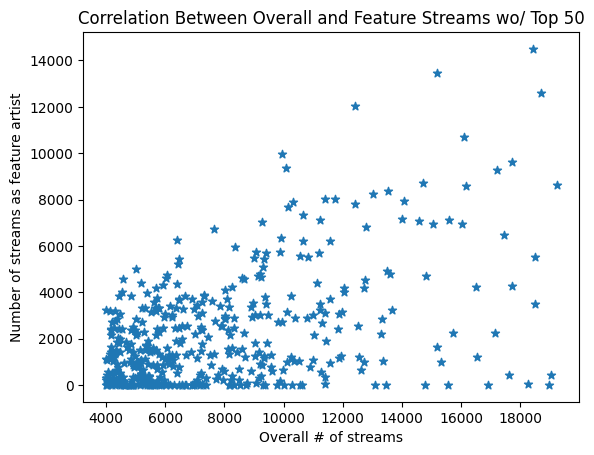

In [13]:
streams_column = shortened_data["Streams"]
feature_column = shortened_data["As Feature"]

plt.scatter(streams_column, feature_column, marker='*')

plt.xlabel("Overall # of streams")
plt.ylabel("Number of streams as feature artist")

plt.title("Correlation Between Overall and Feature Streams wo/ Top 50")

Text(0.5, 1.0, 'Correlation Between Solo Streams and Feature Streams')

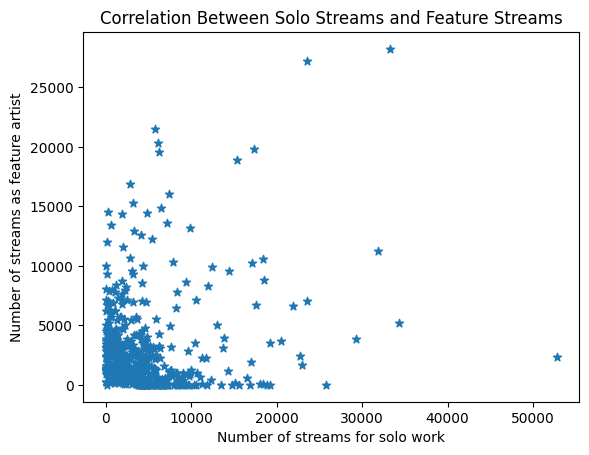

In [14]:
solo_column = final_data["Solo"]
feature_column = final_data["As Feature"]

plt.scatter(solo_column, feature_column, marker='*')

plt.xlabel("Number of streams for solo work")
plt.ylabel("Number of streams as feature artist")

plt.title("Correlation Between Solo Streams and Feature Streams")

Text(0.5, 1.0, 'Correlation Between Solo and Feature Streams w/ Top 50')

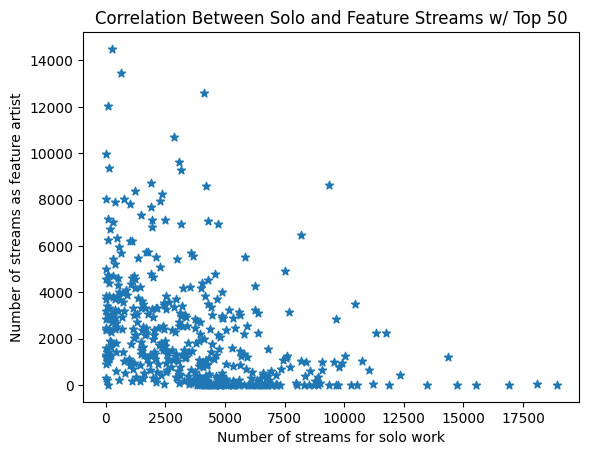

In [15]:
solo_column = shortened_data["Solo"]
feature_column = shortened_data["As Feature"]

plt.scatter(solo_column, feature_column, marker='*')

plt.xlabel("Number of streams for solo work")
plt.ylabel("Number of streams as feature artist")

plt.title("Correlation Between Solo and Feature Streams w/ Top 50")

Text(0.5, 1.0, 'Correlation Between Lead Artist Streams and Feature Streams')

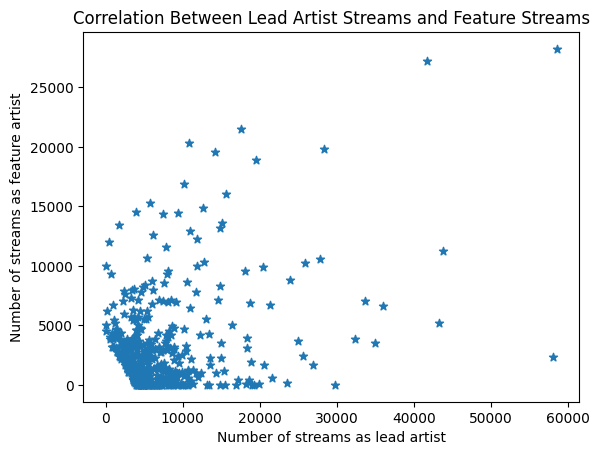

In [16]:
lead_column = final_data["As lead"]
feature_column = final_data["As Feature"]

plt.scatter(lead_column, feature_column, marker='*')

plt.xlabel("Number of streams as lead artist")
plt.ylabel("Number of streams as feature artist")

plt.title("Correlation Between Lead Artist Streams and Feature Streams")

Text(0.5, 1.0, 'Correlation of Lead Artist and Feature Streams wo/ Top 50')

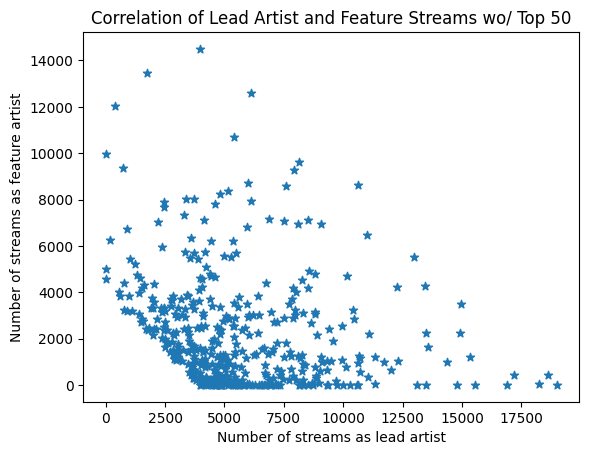

In [17]:
lead_column = shortened_data["As lead"]
feature_column = shortened_data["As Feature"]

plt.scatter(lead_column, feature_column, marker='*')

plt.xlabel("Number of streams as lead artist")
plt.ylabel("Number of streams as feature artist")

plt.title("Correlation of Lead Artist and Feature Streams wo/ Top 50")

The above graphs allow us to see the relationships between artists' streams for solo work as well as projects where they work with other artists as either the lead artist or the featuring. Additionally, the charts without the top 50 help us see how this data changes for artists that aren't as popular.